About Dataset
Context
This classic dataset contains the prices and other attributes of almost 54,000 diamonds. It's a great dataset for beginners learning to work with data analysis and visualization.

Content
price price in US dollars (\$326--\$18,823)

carat weight of the diamond (0.2--5.01)

cut quality of the cut (Fair, Good, Very Good, Premium, Ideal)

color diamond colour, from J (worst) to D (best)

clarity a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

x length in mm (0--10.74)

y width in mm (0--58.9)

z depth in mm (0--31.8)

depth total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

table width of top of diamond relative to widest point (43--95)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
def cal_col(data):
    num_col = data.select_dtypes(include=['float64','int64']).columns
    col = data.columns
    return col,num_col

In [5]:
def calculating_iqr(data,column):
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    q2 = q3 - q1
    upper = q3 + (1.5 * q2)
    lower = q1 - (1.5 * q2)
    return lower,upper

In [7]:
handle_outliers = lambda x: lower if x < lower else(upper if x > upper else x)

In [13]:
def cal_corr(num_col,data,ann = True):
    corr = data[num_col].corr()
    sns.heatmap(data = corr, annot = ann)  
    plt.show()

In [15]:
df = pd.read_csv("diamonds.csv")

In [17]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [19]:
df.tail()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,53940,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [23]:
df["Unnamed: 0"].nunique()

53940

In [25]:
df["carat"].unique()

array([0.23, 0.21, 0.29, 0.31, 0.24, 0.26, 0.22, 0.3 , 0.2 , 0.32, 0.33,
       0.25, 0.35, 0.42, 0.28, 0.38, 0.7 , 0.86, 0.71, 0.78, 0.96, 0.73,
       0.8 , 0.75, 0.74, 0.81, 0.59, 0.9 , 0.91, 0.61, 0.77, 0.63, 0.76,
       0.64, 0.72, 0.79, 0.58, 1.17, 0.6 , 0.83, 0.54, 0.98, 0.52, 1.01,
       0.53, 0.84, 0.51, 1.05, 0.55, 0.87, 1.  , 0.57, 0.82, 1.04, 0.93,
       1.2 , 0.99, 0.34, 0.43, 0.36, 0.95, 0.89, 1.02, 0.97, 0.56, 0.85,
       0.92, 1.27, 0.66, 1.12, 0.68, 1.03, 0.62, 1.22, 1.08, 0.88, 0.5 ,
       1.19, 0.39, 0.65, 1.24, 1.5 , 0.27, 0.41, 1.13, 1.06, 0.69, 0.4 ,
       1.14, 0.94, 1.29, 1.52, 1.16, 1.21, 1.23, 1.09, 0.67, 1.11, 1.1 ,
       1.18, 1.15, 1.25, 1.07, 1.28, 1.51, 0.37, 1.31, 1.26, 1.39, 1.44,
       1.35, 1.3 , 1.32, 1.41, 1.36, 1.45, 1.34, 1.58, 1.54, 1.38, 1.33,
       1.74, 1.64, 1.47, 1.4 , 1.55, 1.95, 2.  , 1.37, 1.83, 1.62, 1.57,
       1.69, 2.06, 1.72, 1.66, 2.14, 1.49, 1.46, 2.15, 1.96, 2.22, 1.7 ,
       1.53, 1.85, 2.01, 2.27, 1.68, 1.56, 1.81, 1.

In [27]:
df["carat"].nunique()

273

In [29]:
df["cut"].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [31]:
df["cut"].nunique()

5

In [33]:
df["color"].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [35]:
df["color"].nunique()

7

In [37]:
df["clarity"].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [39]:
df["clarity"].nunique()

8

In [41]:
df["depth"].unique()

array([61.5, 59.8, 56.9, 62.4, 63.3, 62.8, 62.3, 61.9, 65.1, 59.4, 64. ,
       60.4, 62.2, 60.2, 60.9, 62. , 63.4, 63.8, 62.7, 61. , 58.1, 62.5,
       60.5, 60. , 60.7, 59.5, 58.2, 64.1, 60.8, 61.8, 61.2, 61.1, 65.2,
       58.4, 63.1, 61.6, 59.3, 62.6, 63. , 63.2, 62.1, 61.4, 62.9, 63.7,
       59.2, 59.9, 57.9, 55.1, 57.5, 66.3, 61.7, 58.8, 64.5, 65.3, 59.6,
       64.4, 65.7, 63.6, 61.3, 60.1, 60.3, 58. , 64.6, 59.7, 57.8, 67.9,
       60.6, 57.2, 64.2, 65.8, 67.4, 59. , 63.5, 67.3, 58.7, 66.4, 68.1,
       63.9, 55. , 58.6, 64.3, 58.5, 65. , 56. , 58.3, 53.1, 64.9, 59.1,
       58.9, 66.7, 57.7, 65.4, 53.3, 53. , 67.8, 66.1, 55.8, 67.6, 68.2,
       65.5, 67.7, 69.5, 56.6, 56.3, 66.9, 66. , 67. , 57.6, 67.1, 65.6,
       64.8, 69.3, 66.2, 55.4, 66.8, 64.7, 66.6, 55.9, 57.3, 57.4, 68.3,
       68.5, 56.2, 65.9, 56.5, 56.1, 66.5, 68.4, 69.7, 57.1, 68.7, 56.7,
       68.6, 71.6, 43. , 68.8, 67.5, 69. , 55.2, 68.9, 69.6, 57. , 56.4,
       56.8, 44. , 67.2, 70.1, 71.3, 70.6, 69.8, 71

In [43]:
df["depth"].nunique()

184

In [45]:
df["table"].unique()

array([55. , 61. , 65. , 58. , 57. , 56. , 54. , 62. , 59. , 63. , 60. ,
       55.3, 69. , 53. , 64. , 56.4, 60.5, 67. , 52. , 55.8, 66. , 70. ,
       68. , 54.4, 57.1, 53.6, 54.8, 54.2, 54.9, 56.7, 53.9, 57.8, 54.1,
       55.1, 51. , 58.1, 56.9, 56.5, 53.7, 60.7, 56.2, 56.6, 56.1, 56.3,
       57.2, 57.5, 60.9, 59.8, 62.3, 60.1, 55.9, 50.1, 62.2, 54.5, 55.7,
       53.4, 54.7, 58.8, 59.4, 62.5, 54.3, 60.6, 55.2, 58.6, 49. , 50. ,
       54.6, 62.6, 57.7, 56.8, 57.9, 60.3, 55.6, 59.5, 57.4, 62.4, 60.4,
       53.3, 60.2, 60.8, 58.5, 57.6, 43. , 59.9, 63.5, 57.3, 61.4, 58.3,
       55.4, 58.2, 53.5, 59.7, 55.5, 58.7, 53.8, 59.1, 53.2, 59.3, 61.1,
       51.6, 95. , 61.2, 59.2, 58.4, 53.1, 52.8, 44. , 61.3, 61.9, 61.8,
       59.6, 61.5, 58.9, 64.3, 62.8, 71. , 52.4, 63.3, 61.7, 64.2, 73. ,
       65.4, 63.4, 62.1, 79. , 76. , 61.6])

In [47]:
df["table"].nunique()

127

In [49]:
df["price"].nunique()

11602

In [51]:
df["x"].nunique()

554

In [53]:
df["y"].nunique()

552

In [55]:
df["z"].nunique()

375

In [57]:
df.drop("Unnamed: 0",axis = 1,inplace = True)

In [59]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [61]:
col,num_col = cal_col(df)

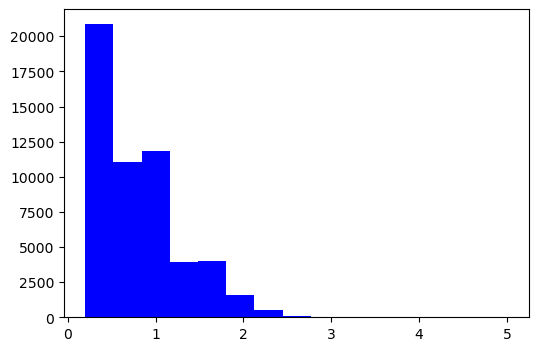

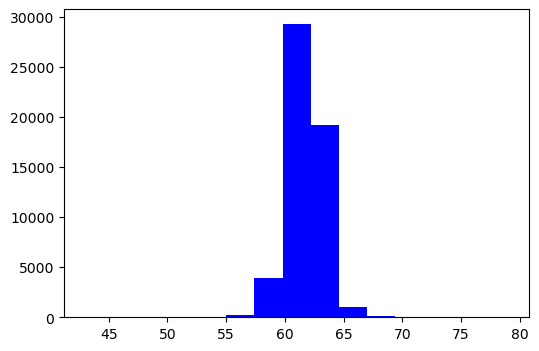

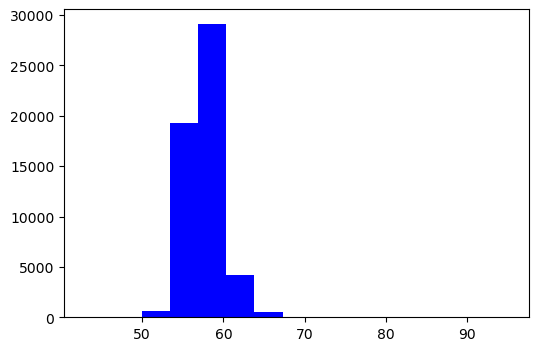

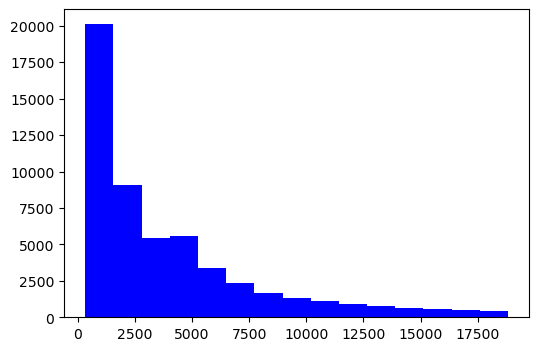

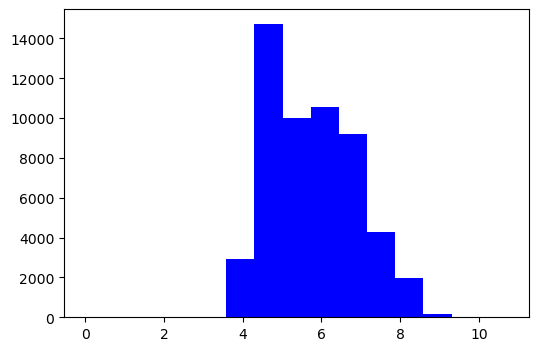

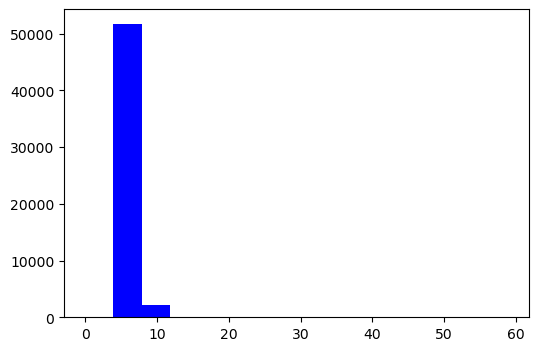

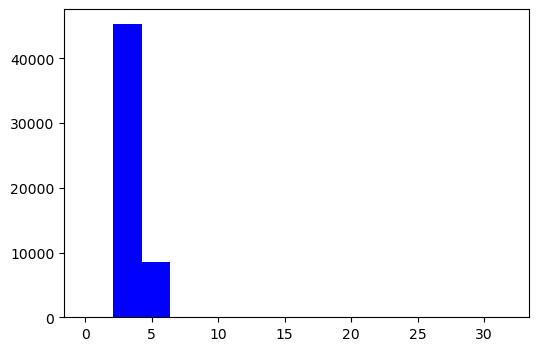

In [63]:
for c in num_col:
    plt.figure(figsize=(6, 4))
    plt.hist(df[c],bins = 15,color= 'blue')
    plt.show()

In [65]:
n_col = num_col.drop('price')
n_col

Index(['carat', 'depth', 'table', 'x', 'y', 'z'], dtype='object')

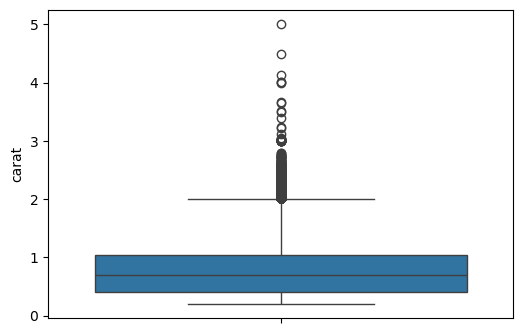

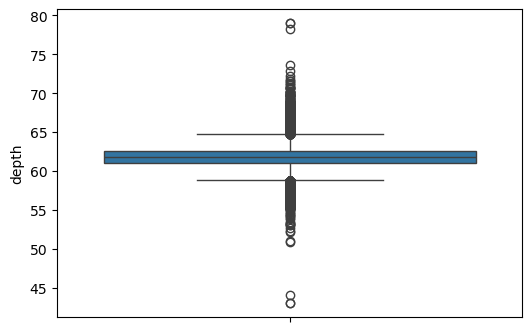

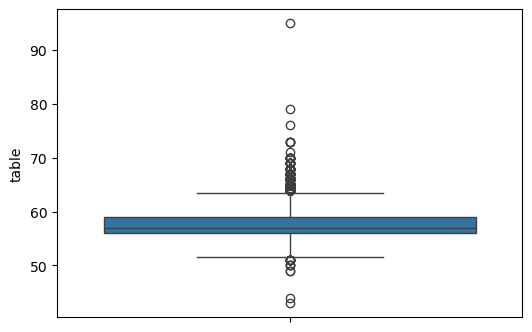

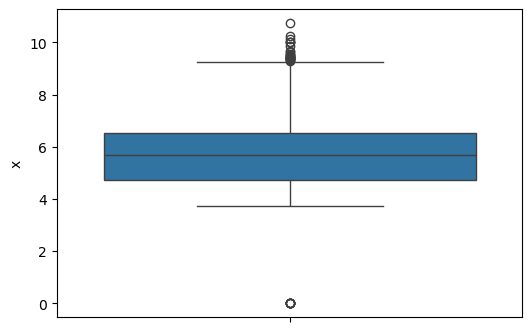

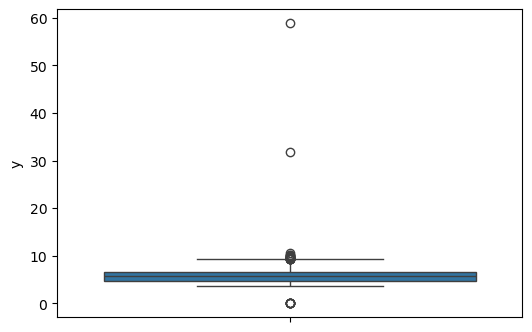

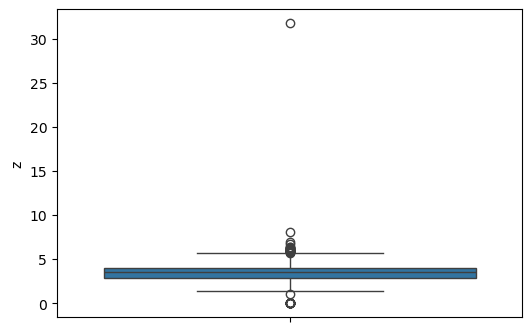

In [67]:
for c in n_col:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data= df[c])
    plt.show()

In [68]:
# handling outliers except price column
cond = pd.Series(True,index = df.index)
for i in n_col:
    lower,upper = calculating_iqr(df,i)
    cond &= (df[i] > lower) & (df[i] < upper)

In [71]:
df = df[cond]

In [73]:
df.shape

(49097, 10)

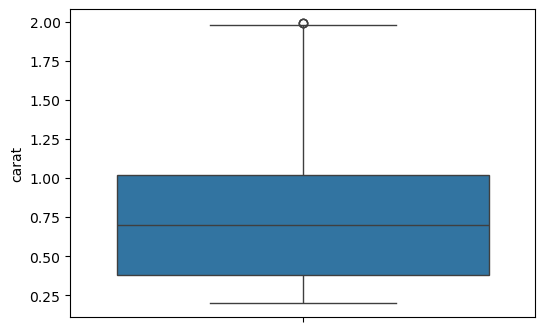

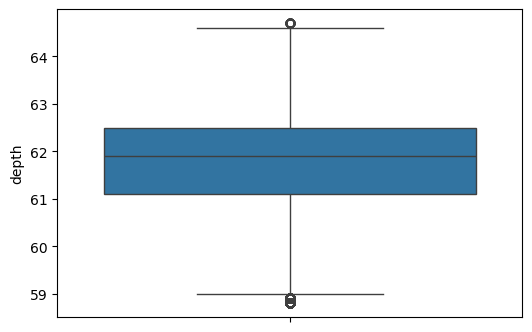

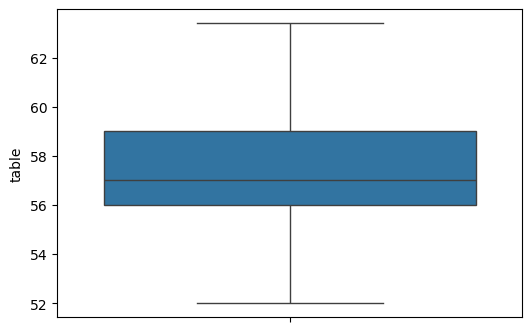

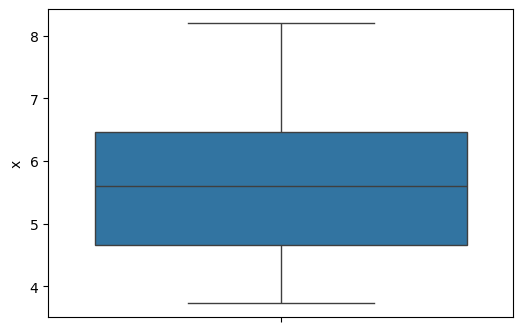

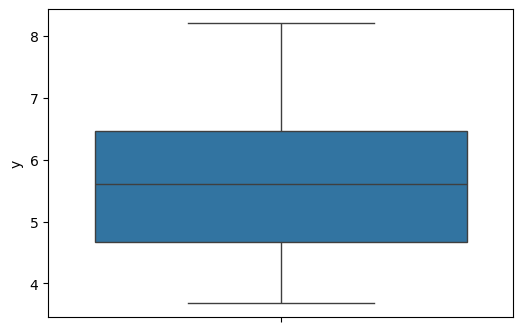

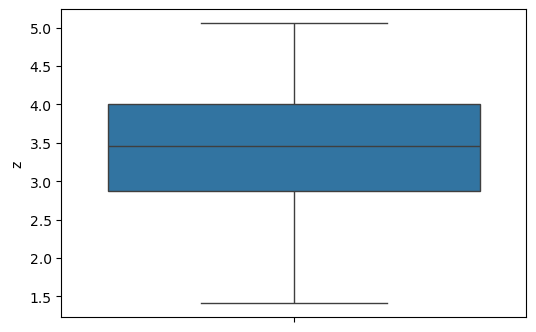

In [75]:
for c in n_col:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data= df[c])
    plt.show()

In [76]:
df.describe()

,carat,depth,table,price,x,y,z
count,49097.000000,49097.000000,49097.000000,49097.000000,49097.000000,49097.000000,49097.000000
mean,0.734927,61.783282,57.265957,3468.404200,5.605296,5.610062,3.464332
std,0.393666,1.105105,2.017220,3360.024517,1.017869,1.012230,0.629100
min,0.200000,58.800000,52.000000,326.000000,3.730000,3.680000,1.410000
25%,0.380000,61.100000,56.000000,906.000000,4.660000,4.670000,2.870000
50%,0.700000,61.900000,57.000000,2198.000000,5.600000,5.600000,3.460000
75%,1.020000,62.500000,59.000000,4920.000000,6.460000,6.460000,4.000000
max,1.990000,64.700000,63.400000,18806.000000,8.200000,8.210000,5.060000


In [78]:
df['volume'] = ((df['x'] * df['y'])/2) * df['z']

In [81]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,volume
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,19.101015
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,17.252928
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,23.362290
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,25.958625
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48,19.346976


In [83]:
cat_col = ['cut','color','clarity']

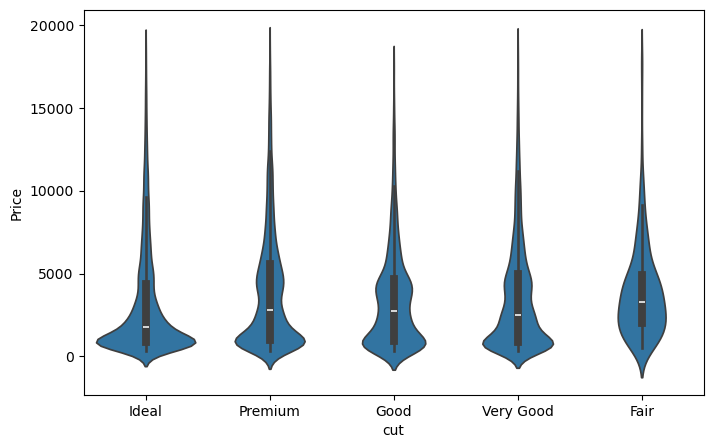

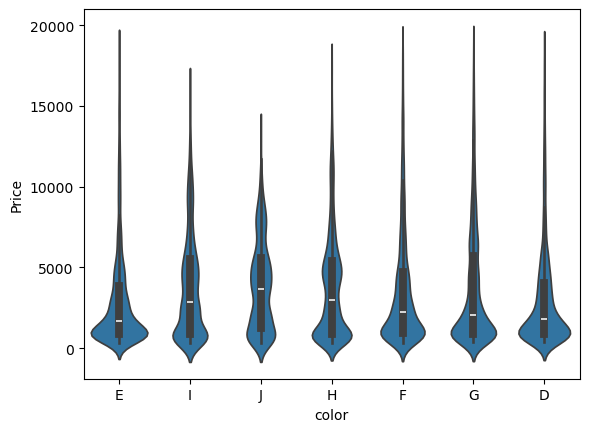

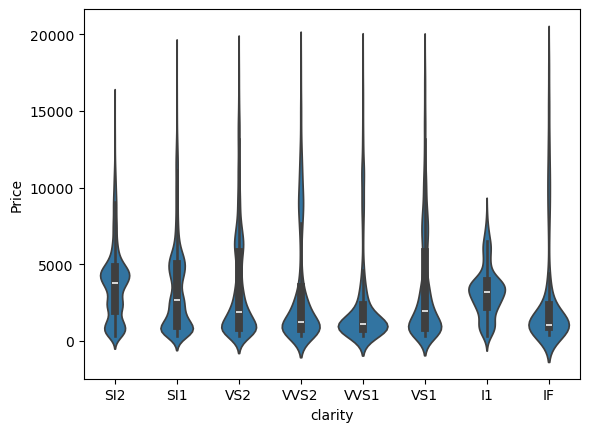

In [85]:
plt.figure(figsize =(8,5))
for c in cat_col:
    sns.violinplot(x = c, y = 'price',data = df)
    plt.xlabel(f'{c}')
    plt.ylabel('Price')
    plt.show()

* As the median differs from variable to another in each categorical variable then there is a relation between them and the price column

### Apply encoding

In [89]:
# apply oridinal encoding
cut_mapping = {'Fair': 1, 'Good':2, 'Very Good':3, 'Premium':4,'Ideal':5}
df = df.replace({'cut':cut_mapping})
df.head()

C:\Users\asust\AppData\Local\Temp\ipykernel_25776\1580734042.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({'cut':cut_mapping})


,carat,cut,color,clarity,depth,table,price,x,y,z,volume
0,0.23,5,E,SI2,61.5,55.0,326,3.95,3.98,2.43,19.101015
1,0.21,4,E,SI1,59.8,61.0,326,3.89,3.84,2.31,17.252928
3,0.29,4,I,VS2,62.4,58.0,334,4.20,4.23,2.63,23.362290
4,0.31,2,J,SI2,63.3,58.0,335,4.34,4.35,2.75,25.958625
5,0.24,3,J,VVS2,62.8,57.0,336,3.94,3.96,2.48,19.346976


In [91]:
# apply oridinal encoding
color_mapping = {'J': 1, 'I':2, 'H':3, 'G':4,'F':5, 'E':6, 'D':7}
df = df.replace({'color':color_mapping})
df.head()

C:\Users\asust\AppData\Local\Temp\ipykernel_25776\2562612714.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({'color':color_mapping})


,carat,cut,color,clarity,depth,table,price,x,y,z,volume
0,0.23,5,6,SI2,61.5,55.0,326,3.95,3.98,2.43,19.101015
1,0.21,4,6,SI1,59.8,61.0,326,3.89,3.84,2.31,17.252928
3,0.29,4,2,VS2,62.4,58.0,334,4.20,4.23,2.63,23.362290
4,0.31,2,1,SI2,63.3,58.0,335,4.34,4.35,2.75,25.958625
5,0.24,3,1,VVS2,62.8,57.0,336,3.94,3.96,2.48,19.346976


In [93]:
# apply oridinal encoding
clarity_mapping = {'I1': 1, 'SI2':2, 'SI1':3, 'VS2':4,'VS1':5, 'VVS2':6, 'VVS1':7,'IF':8}
df = df.replace({'clarity':clarity_mapping})
df.head()

C:\Users\asust\AppData\Local\Temp\ipykernel_25776\1597184505.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({'clarity':clarity_mapping})


,carat,cut,color,clarity,depth,table,price,x,y,z,volume
0,0.23,5,6,2,61.5,55.0,326,3.95,3.98,2.43,19.101015
1,0.21,4,6,3,59.8,61.0,326,3.89,3.84,2.31,17.252928
3,0.29,4,2,4,62.4,58.0,334,4.20,4.23,2.63,23.362290
4,0.31,2,1,2,63.3,58.0,335,4.34,4.35,2.75,25.958625
5,0.24,3,1,6,62.8,57.0,336,3.94,3.96,2.48,19.346976


### Apply scaling 

In [96]:
from sklearn.preprocessing import StandardScaler

In [98]:
# Standardization
scaler = StandardScaler()
df[num_col] = scaler.fit_transform(df[num_col])

In [100]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,volume
0,-1.282640,5,6,2,-0.256342,-1.123318,-0.935242,-1.626254,-1.610383,-1.644162,19.101015
1,-1.333445,4,6,3,-1.794673,1.851102,-0.935242,-1.685201,-1.748693,-1.834913,17.252928
3,-1.130225,4,2,4,0.558068,0.363892,-0.932861,-1.380640,-1.363401,-1.326244,23.362290
4,-1.079420,2,1,2,1.372478,0.363892,-0.932563,-1.243096,-1.244850,-1.135494,25.958625
5,-1.257238,3,1,6,0.920028,-0.131845,-0.932266,-1.636078,-1.630142,-1.564683,19.346976


### Correlation and Plotting

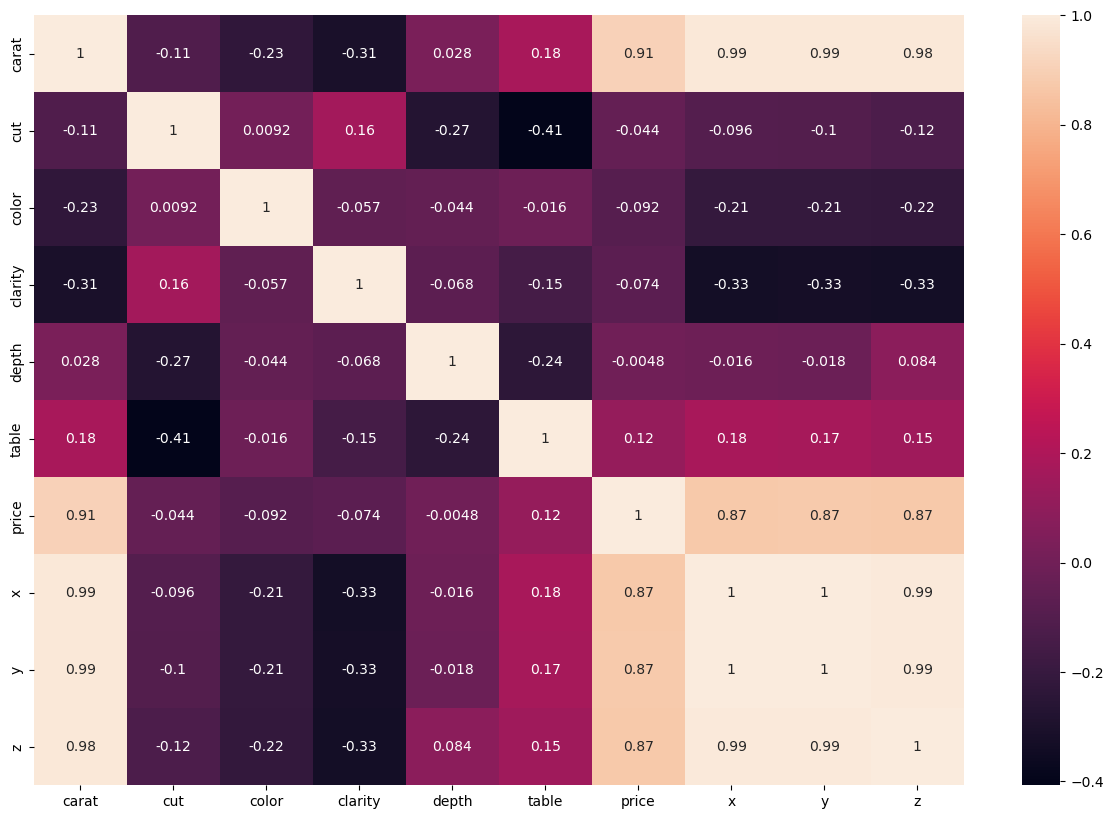

In [103]:
plt.figure(figsize=(15, 10))
cal_corr(col,df)

In [106]:
col_to_drop = ['depth','table','x','y','z']

In [108]:
df_dropped = df.drop(col_to_drop, axis=1)

#### plotting 

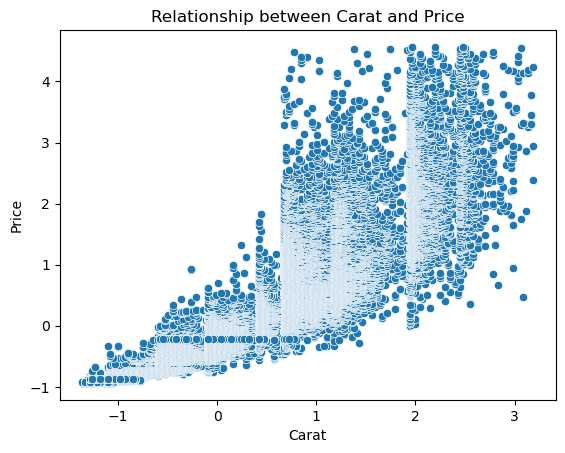

In [111]:
sns.scatterplot(x= 'carat', y='price', data=df_dropped)
plt.title("Relationship between Carat and Price")
plt.xlabel('Carat')
plt.ylabel('Price')
plt.show()

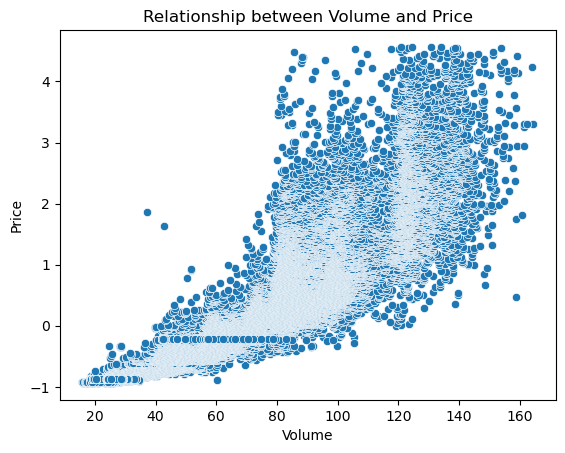

In [113]:
sns.scatterplot(x= 'volume', y='price', data=df_dropped)
plt.title("Relationship between Volume and Price")
plt.xlabel('Volume')
plt.ylabel('Price')
plt.show()

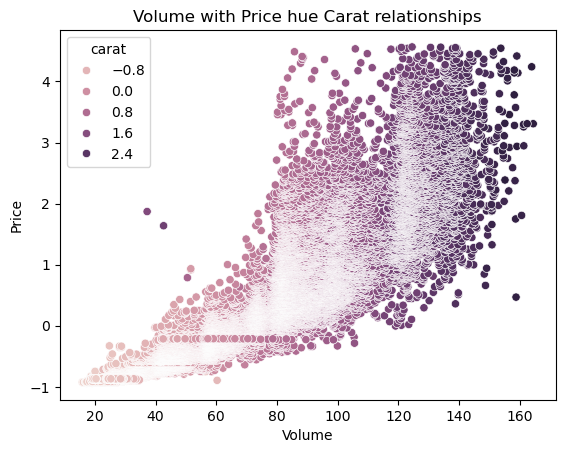

In [115]:
sns.scatterplot(x= 'volume', y='price',hue='carat', data=df_dropped)
plt.title("Volume with Price hue Carat relationships")
plt.xlabel('Volume')
plt.ylabel('Price')
plt.show()

### Applying models

In [136]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [124]:
# splitting 
X = df_dropped.drop('price', axis = 1)
y = df_dropped['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Linear regression 

In [126]:
lin = LinearRegression()

In [130]:
lin.fit(X_train,y_train)

LinearRegression()

In [134]:
y_pred = lin.predict(X_test)

In [142]:
test_r2 = r2_score(y_test, y_pred)
test_r2

0.8936181926725588